In [3]:
# Useful imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("twcs.csv")

In [5]:
# shows first few rows of the data
dataset.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [8]:
# shape gives dimentions; (x # of entires, y # of columns)
dataset.shape

(2811774, 7)

In [9]:
# Shows type of value each colmun contains ; (object = string)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [10]:
dataset.describe()
# Only two columns show up; they're the only int/flot dtypes of the dataset
# Knowing the average of this isn't that helpful; as they're just IDs

,tweet_id,in_response_to_tweet_id
count,2.811774e+06,2.017439e+06
mean,1.504565e+06,1.463141e+06
std,8.616450e+05,8.665730e+05
min,1.000000e+00,1.000000e+00
25%,7.601652e+05,7.155105e+05
50%,1.507772e+06,1.439805e+06
75%,2.253296e+06,2.220646e+06
max,2.987950e+06,2.987950e+06


In [11]:
# Finds how many null/missing values there are
# 0 means no missing values
dataset.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

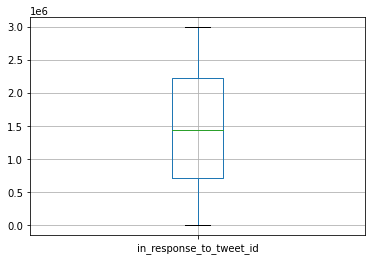

In [13]:
dataset.boxplot(column="in_response_to_tweet_id")
plt.show

<AxesSubplot:>

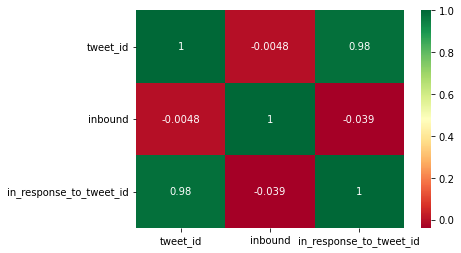

In [61]:
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')
#high corrolation: tweet_id - in_response_to_tweet_id
#low corrolation between tweet_id - inbound, in_response_to_tweet_id - inbound

<AxesSubplot:xlabel='tweet_id', ylabel='in_response_to_tweet_id'>

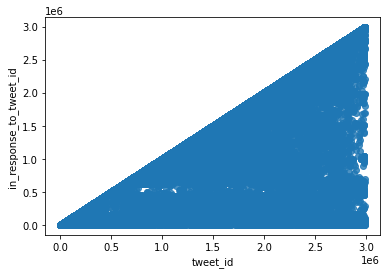

In [68]:
sns.regplot(x='tweet_id', y='in_response_to_tweet_id', data=dataset)
#seems to be linear, as for every original, there is an attatched responding tweet ID

In [69]:
duplicateValues = dataset.duplicated("inbound")
print(duplicateValues)
dataset[duplicateValues]

0          False
1          False
2           True
3           True
4           True
           ...  
2811769     True
2811770     True
2811771     True
2811772     True
2811773     True
Length: 2811774, dtype: bool


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0


In [80]:
df = pd.DataFrame(d)
trueCount = df['inbound'].value_counts()[True]
print(trueCount)
# Tried to sum up boolean values in the "inbound" column
# I searched the internet for how to do it, but attempt failed

NameError: name 'd' is not defined